In [2]:
# import kagglehub
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
%pip install scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
%pip install pyarrow
import os


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("baraazaid/superherodb")

# print("Path to dataset files:", path)

In [3]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "graphs")
DATASET_PATH = "superheroes.csv"

CATEGORY_MAP = {
    'Absolute_Survival': [
        'Acausality', 'Reality Warping', 'Time Manipulation', 'Fate Manipulation', 'Conceptual Manipulation', 
        'Plot Manipulation', 'Nigh-Omnipotence', 'Omnipotence', 'Nigh-Omniscience', 'Omniscience', 
        'Omnipresence', 'Nigh-Omnipresence', 'Abstract Existence', 'Existence Erasure', 'Wishing', 
        'Resurrection', 'Immortality', 'Metaphysics Manipulation', 'Pataphysics Manipulation', 
        'Apotheosis', 'Omega Effect', 'Omega Sanction', 'The Force', 'Will Of God', 'Transduality', 
        'Causality Manipulation', 'Origin Manipulation', 'Subjective Reality', 'Nonexistent Physiology',
        'Nothingness Aspect Manifestation', 'Omnilock', 'Unity', 'Zenith', 'The Life Entity', 
        'Divine Powers', 'Divinity'
    ],
    'Mobility_Escape': [
        'Super Speed', 'Force Speed', 'Teleportation', 'Flight', 'Spaceflight', 'Interstellar Travel', 
        'Dimensional Travel', 'Portal Creation', 'Orbing', 'Levitation', 'Gliding', 'Swinging', 
        'Wallcrawling', 'Surface Scaling', 'Electrical Transport', 'Phasing', 'Intangibility', 
        'Pseudo-Flight', 'Jump', 'Agility', 'Acrobatics', 'Amphibious Respiration', 'Subterranean', 
        'Burrowing', 'Dig', 'Homing Attack', 'Afterimage Creation', 'Speed Force', 'Negative Speed Force'
    ],
    'Mass_Destruction': [
        'Black Hole Manipulation', 'Antimatter Manipulation', 'Matter Manipulation', 'Existence Erasure', 
        'Molecular Dissipation', 'Molecular Combustion', 'Vaporising Beams', 'Energy Blasts', 
        'Energy Beams', 'Nova Force', 'Astro Force', 'Entropy Projection', 'Self-Destruction', 
        'Shockwaves Generation', 'Explosion Manipulation', 'Plasma Manipulation', 'Dark Matter Manipulation', 
        'Quantum Manipulation', 'Supreme Power', 'Power Cosmic', 'Power Primordial', 'Enigma Force', 
        'Uni-Power', 'The Metal', 'Deconstruction'
    ],
    'Elemental_Control': [
        'Fire Control', 'Water Control', 'Wind Control', 'Terrakinesis', 'Electrokinesis', 'Cryokinesis', 
        'Magma Manipulation', 'Geokinesis', 'Sand Manipulation', 'Smoke Manipulation', 'Plant Control', 
        'Wood Manipulation', 'Weather Control', 'Light Control', 'Darkness Manipulation', 'Umbrakinesis', 
        'Shadow Manipulation', 'Metal Manipulation', 'Gold Manipulation', 'Crystal Touch', 'Acid Manipulation', 
        'Chemokinesis', 'Radiation Control', 'Magnetism', 'Electro-Magnetism Manipulation', 'Vibration Manipulation', 
        'Seismic Power', 'Vacuum Manipulation', 'Neon Blasts', 'Rainbow Energy', 'Element Control', 
        'Elemental Transformation', 'Elemental Transmogrification', 'The Green', 'The Red', 'The Grey', 
        'The White', 'The Black', 'The Divided', 'The Melt'
    ],
    'Intellect_Strategy': [
        'Intelligence', 'Master Tactician', 'Information Analysis', 'Photographic Deduction', 
        'Perfect Recollection', 'Mechanical Aptitude', 'Robotic Engineering', 'Hacking', 
        'Technopath/Cyberpath', 'Intuitive aptitude', 'Preparation', 'Leadership', 'Deception', 
        'Omnilingualism', 'Social Influencing', 'Mathematics Manipulation', 'Writing Manipulation', 
        'Information Manipulation', 'Data Manipulation'
    ],
    'Durability_Defense': [
        'Invulnerability', 'Durability', 'Force Fields', 'Energy Armor', 'Natural Armor', 
        'Changing Armor', 'Power Suit', 'Shield Bash', 'Deflection', 'Attack Reflection', 
        'Damage Reduction', 'Regeneration', 'Accelerated Healing', 'Symbiotic Regeneration', 
        'Self-Sustenance', 'Stamina', 'Endurance', 'Pain Suppression', 'Indomitable Will', 
        'Fearless', 'Density Control', 'Size Changing', 'Inorganic Physiology', 'Body Inflation'
    ],
    'Crowd_Control': [
        'Mind Control', 'Hypnotic Suggestion', 'Sleep Manipulation', 'Paralysis', 'Petrification', 
        'Fear Inducement', 'Rage Inducement', 'Compassion Inducement', 'Love Inducement', 
        'Hope Inducement', 'Greed Inducement', 'Apathy', 'Confusion', 'Illusions', 'Subjective Reality', 
        'Dream Manipulation', 'Memory Manipulation', 'Madness Manipulation', 'Insanity', 
        'Status Effect Inducement', 'BFR', 'Gravity Control', 'Anti-Gravity', 'Time Stop', 
        'Stasis', 'Molecular Immobilization', 'Sealing', 'Banish', 'Binding'
    ],
    'Detection_Senses': [
        'Clairvoyance', 'Precognition', 'Postcognition', 'Cosmic Awareness', 'Dimensional Awareness', 
        'Spatial Awareness', 'Radar Sense', 'Echolocation', 'Sonar', 'Vision - Telescopic', 
        'Vision - Microscopic', 'Vision - Thermal', 'Vision - Heat', 'Vision - Infrared', 
        'Vision - Night', 'Vision - X-Ray', 'Vision - Cryo', 'Enhanced Hearing', 'Enhanced Smell', 
        'Enhanced Touch', 'Enhanced Taste', 'Enhanced Sight', 'Psychometry', 'Power Sense', 
        'Scanning', 'Omni-Sense', 'Extrasensory Perception', 'Danger Sense', 'Sotobro Effect'
    ],
    'Combat_Mastery': [
        'Master Martial Artist', 'Swordsmanship', 'Archery', 'Marksmanship', 'Weapons Master', 
        'Weapon Creation', 'Weapon Summoning', 'Natural Weapons', 'Jaw Strength', 'Tentacles', 
        'Multiple Limbs', 'Acrobatics', 'Dexterity', 'Reflexes', 'Photographic Reflexes', 
        'Instinctive Reaction', 'Eagle Fang Karate', 'Cobra Kai Karate', 'Spinjitzu', 
        'Ninjutsu', 'Pressure Points', 'Weapon-based Powers', 'Grappling/Climbing'
    ],
    'Power_Manipulation': [
        'Power Absorption', 'Power Mimicry', 'Power Nullifier', 'Power Bestowal', 'Power Augmentation', 
        'Power Modification', 'Ability Shift', 'Copying', 'Mimicry', 'Omnimimicry', 'Awakened Power', 
        'Latent Abilities', 'New Power', 'Reactive Power Level', 'Reactive Evolution', 'Adaptation', 
        'Energy Manipulation', 'Energy Absorption', 'Energy Constructs', 'Energy Embodiment', 
        'Magic Absorption', 'Chaos Energy', 'Lantern Power Ring', 'Qwardian Power Ring', 
        'Omnitrix', 'Stands', 'Magic', 'Arcane Magic', 'Chaos Magic', 'Rune Magic', 'Dark Arts', 
        'Summoning', 'Avatar Creation', 'Duplication', 'Cloning', 'Fusion'
    ],
    'Life_Death_Manipulation': [
        'Life Manipulation', 'Death Manipulation', 'Necromancy', 'Soul Manipulation', 'Exorcism', 
        'Purification', 'Salvation', 'Grim Reaping', 'Death Touch', 'Corruption', 'Hellfire Manipulation', 
        'Holy Manipulation', 'Unholy Manipulation', 'Blood Manipulation', 'Biokinesis', 
        'Organic Manipulation', 'Body Puppetry', 'Possession', 'Technological Possession', 
        'Animation', 'Heal', 'Vitakinesis', 'Age Manipulation', 'Regeneration Negation', 
        'Immortality Negation', 'Zombie Physiology', 'Demon Physiology', 'Angel Physiology', 
        'Godly Physiology', 'Gamma Mutant Physiology'
    ],
    'Body_Modification': [
        'Shapeshifting', 'Transformation', 'Size Changing', 'Elasticity', 'Cyborgization', 
        'Bionics', 'Nanotechnology', 'Symbiote Costume', 'Multiple Personalities', 'Hair Manipulation', 
        'Cloth Manipulation', 'Paper Manipulation', 'Substance Secretion', 'Acidic Spit', 
        'Venomous Bite', 'Web Creation', 'Liquid Transmutation', 'Melting', 'Matter Absorption'
    ],
    'Resistance_Immunity': [
        'Magic Resistance', 'Mind Control Resistance', 'Telepathy Resistance', 'Possession Resistance', 
        'Illusion Resistance', 'Fear Resistance', 'Curse Resistance', 'Existence Erasure Resistance', 
        'Reality Warping Resistance', 'Time Manipulation Resistance', 'Plot Manipulation Resistance', 
        'Causality Resistance', 'Fate Resistance', 'Soul Resistance', 'Corruption Resistance', 
        'Radiation Immunity', 'Radiation Resistance', 'Electricity Resistance', 'Fire Resistance', 
        'Cold Resistance', 'Heat Resistance', 'Hellfire Resistance', 'Toxin and Disease Resistance', 
        'Toxin and Disease Control', 'Acid Resistants', 'Energy Resistance', 'Holy Resistance', 
        'Unholy Resistance', 'Transmutation Immunity', 'Power Absorption Immunity', 
        'Power Mimicry Immunity', 'Clairvoyance Resistance', 'Disguise Resistance', 'Invulnerability'
    ],
    'Burden_Risk': [
        'Bloodlust', 'Berserk Mode', 'Rage Power', 'Insanity', 'Self-Destruction', 
        'Damage Transferal', 'Pain Manipulation', 'Multiple Personalities'
    ],
    'Social_Useless': [
        'None', 'Singing', 'Musical Inducement', 'Broadway Force', 'Toon Force', 'The Fourth Wall', 
        'Sailing', 'Vehicular Mastery', 'Enhanced Thievery', 'Cooking', 'Food Manipulation', 
        'Luck', 'Probability Manipulation', 'Perspective Manipulation'
    ]
}

ABILITIES_MAP = {ability: group for group, abilities in CATEGORY_MAP.items() for ability in abilities}

WEIGHT_MAP = {
    'Absolute_Survival': 100,
    'Mobility_Escape': 85,
    'Mass_Destruction': 80,
    'Elemental_Control': 55,
    'Intellect_Strategy': 60,
    'Durability_Defense': 70,
    'Crowd_Control': 65,
    'Detection_Senses': 45,
    'Combat_Mastery': 30,
    'Power_Manipulation': 40,
    'Life_Death_Manipulation': 35,
    'Body_Modification': 25,
    'Resistance_Immunity': 50,
    'Burden_Risk': -30,
    'Social_Useless': 5   
}

In [4]:
def load_data(dataset_path=DATASET_PATH):
    return pd.read_csv(dataset_path)

superheroes = pd.read_csv(DATASET_PATH)
print(superheroes.info())

/var/folders/6b/85w6rv6x1457jnqqhs70334h0000gn/T/ipykernel_43851/109425608.py:4: DtypeWarning: Columns (0: Class_value, 1: Combat, 2: Durability, 3: IQ, 4: Intelligence, 5: Level, 6: Omnipotent, 7: Omnipresent, 8: Omniscient, 9: Power, 10: Speed, 11: Speed_velocity, 12: Strength, 13: Strength_force, 14: Tier) have mixed types. Specify dtype option on import or set low_memory=False.
  superheroes = pd.read_csv(DATASET_PATH)


<class 'pandas.DataFrame'>
RangeIndex: 28118 entries, 0 to 28117
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alignment       20562 non-null  str   
 1   Alter_Egos      3398 non-null   str   
 2   Base            6015 non-null   str   
 3   Character       28118 non-null  str   
 4   Class_value     27940 non-null  object
 5   Collections     8915 non-null   str   
 6   Combat          27940 non-null  object
 7   Creator         23597 non-null  str   
 8   Durability      27940 non-null  object
 9   Equipment       1628 non-null   str   
 10  Eye_color       19892 non-null  str   
 11  Formerly        1462 non-null   str   
 12  Full_name       4886 non-null   str   
 13  Gender          20339 non-null  str   
 14  Hair_color      19788 non-null  str   
 15  Height          27940 non-null  str   
 16  IQ              27940 non-null  object
 17  Intelligence    27940 non-null  object
 18  Leader          4

In [5]:
def aggregate_func(series: pd.Series):
    clean_series = series.dropna()
    if clean_series.empty:
        return np.nan
    elif pd.api.types.is_numeric_dtype(clean_series):
        return clean_series.max()
    else:
        return max(clean_series.astype(str), key=len)


def process_powers_string(row):
    powers = str(row).split(',')
    score = 0
    power_groups = set()
    for power in powers:
        # print(power, '-', CATEGORY_MAP.get(power))
        power_groups.add(ABILITIES_MAP.get(power))
    # print(power_groups)
    for power_gr in power_groups:
        if power_gr is not None:
            score += WEIGHT_MAP.get(power_gr, 0)
    return score


def preprocess_dataframe(df):
    df['Class_value'] = pd.to_numeric(df['Class_value'], errors='coerce')
    df['Combat'] = pd.to_numeric(df['Combat'], errors='coerce')
    df['Durability'] = pd.to_numeric(df['Durability'], errors='coerce')
    df['Intelligence'] = pd.to_numeric(df['Intelligence'], errors='coerce')
    df['Level'] = pd.to_numeric(df['Level'], errors='coerce')
    df['Omnipotent'] = pd.to_numeric(df['Omnipotent'], errors='coerce')
    df['Omnipresent'] = pd.to_numeric(df['Omnipresent'], errors='coerce')
    df['Omniscient'] = pd.to_numeric(df['Omniscient'], errors='coerce')
    df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
    df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')
    df['Strength'] = pd.to_numeric(df['Strength'], errors='coerce')
    df['Tier'] = pd.to_numeric(df['Tier'], errors='coerce')
    
    df['power_count'] = df['Super_powers'].apply(lambda x: len(str(x).split(',')) if str(x) != 'nan' else 0)
    df['power_score'] = df['Super_powers'].apply(lambda x: process_powers_string(x) if str(x) != 'nan' else 10)
    
    selected_cols = ['Class_value', 'Level', 'Tier', 'Combat', 'Durability', 'Intelligence', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Power', 'Speed', 'Strength', 'power_count', 'power_score']
    df_new = df[selected_cols].copy()
    return df_new


class Aggregator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        X_aggregated = X.groupby('Name').agg(aggregate_func).reset_index()
        # X_Names = pd.DataFrame(X_aggregated['Name']).copy()
        # X_Names.to_parquet("Name_col.parquet", engine='pyarrow', index=False)
        X_aggregated = X_aggregated.drop('Name', axis=1)
        return X_aggregated

    
class Preprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        X_preprocessed = preprocess_dataframe(X)
        return X_preprocessed


superheroes_copy = superheroes.copy()
selected_cols = ['Name', 'Class_value', 'Level', 'Tier', 'Combat', 'Durability', 'Intelligence', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Power', 'Speed', 'Strength', 'Super_powers']
X = superheroes_copy[selected_cols].copy()

superheroes_pipeline = Pipeline([
    # ('name_preprocessor', NamePreprocessor()),
    ('aggregator', Aggregator()),
    ('preprocessor', Preprocessor()),
    ('std_scaler', StandardScaler()),
])

X_processed = superheroes_pipeline.fit_transform(X)
X_final = pd.DataFrame(X_processed).reset_index()
X_final.to_parquet("data_cols_preprocessed.parquet", engine='pyarrow', index=False)
# df_Names = pd.read_parquet("Name_col.parquet")
# X_final_full = pd.concat([df_Names, X_final])
# selected_cols = ['Name', 'Class_value', 'Level', 'Tier', 'Combat', 'Durability', 'Intelligence', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Power', 'Speed', 'Strength', 'power_count', 'power_score']
# dfS = pd.DataFrame(X_final_full, columns=selected_cols)
# dfS.to_parquet("superheroes_preprocessed.parquet", engine='pyarrow', index=False)
print(X_final.head())

   index         0         1         2         3         4         5    6  \
0      0  0.132345  1.617985  1.893275  0.837935  1.381863  1.497408  0.0   
1      1  1.264735  1.617985  2.244310  0.668670  1.381863  1.497408  0.0   
2      2 -0.073101  1.617985  1.542240  0.668670  1.381863  1.497408  0.0   
3      3 -0.073222 -0.558581 -0.212934  0.668670  0.287286  0.460020  0.0   
4      4 -0.073222 -1.102722  0.138101 -1.904149 -1.026207 -1.355409  0.0   

          7         8         9        10        11        12        13  
0 -0.232495  8.170531  1.172601  1.345295  1.262991 -0.661548 -0.987177  
1 -0.232495 -0.122391  1.172601  1.345295  1.262991 -0.682139 -0.987177  
2 -0.232495 -0.122391  1.172601  1.345295  1.262991  0.635666  1.391019  
3 -0.232495 -0.122391 -0.451736  0.051252  0.273480  0.100308  0.504234  
4 -0.232495 -0.122391 -1.190071 -1.216909 -1.186048 -0.661548 -0.926715  


In [6]:
from sklearn.model_selection import train_test_split

superheroes = pd.read_parquet("data_cols_preprocessed.parquet")
superheroes_copy = superheroes.copy()
superheroes = superheroes.drop('index', axis=1)
train_set, test_set = train_test_split(superheroes, test_size=0.2, random_state=42)
selected_cols = ['Class_value', 'Level', 'Tier', 'Combat', 'Durability', 'Intelligence', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Power', 'Speed', 'Strength', 'power_count', 'power_score']
print(train_set.head())
train_labels = train_set['13']
train_set = train_set.drop('13', axis=1)
train_set = pd.DataFrame(train_set).fillna(0.0)
train_labels = pd.DataFrame(train_labels).fillna(0.0)
print(train_set.head())
print(train_labels.head())

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set, train_labels)

import joblib

joblib.dump(lin_reg, "apocalypse_regression_model.pkl")
lin_reg_loaded = joblib.load("apocalypse_regression_model.pkl")

             0         1         2         3         4         5    6  \
6547 -0.073222 -0.014439 -0.563969  1.176463 -0.670469 -0.577368  0.0   
6032 -0.073222 -0.558581 -0.212934 -1.531767 -0.533647 -1.355409  0.0   
6670 -0.073222 -0.014439 -0.212934 -0.177652 -0.123181 -0.836715  0.0   
6212 -0.073222  1.073844  1.191206 -0.516181  1.381863 -0.577368  0.0   
3871 -0.073222 -1.102722 -0.915004 -1.023974 -1.053571 -1.096062  0.0   

             7         8         9        10        11        12        13  
6547 -0.232495 -0.122391 -0.599403 -0.336960 -0.889195  0.100308  0.867009  
6032 -0.232495 -0.122391 -0.304069 -0.595769  0.644547 -0.311506 -0.221318  
6670 -0.232495 -0.122391 -0.008735 -0.466365  0.397169  0.162080  1.189476  
6212 -0.232495 -0.122391  1.172601  1.345295  1.262991  0.347396  1.471635  
3871 -0.232495 -0.122391 -1.485405 -1.087505 -1.186048 -0.723320 -1.349953  
             0         1         2         3         4         5    6  \
6547 -0.073222 -0.014439 -

In [7]:
# WATCHING WEIGHTS
weights = lin_reg_loaded.coef_.flatten()
atrib_cols = ['Class_value', 'Level', 'Tier', 'Combat', 'Durability', 'Intelligence', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Power', 'Speed', 'Strength', 'power_count']
weight_df = pd.DataFrame({
    'feature': atrib_cols,
    'weight': weights
}).sort_values(by='weight', ascending=False)
print(weight_df)

         feature    weight
12   power_count  0.692953
9          Power  0.365293
3         Combat  0.057252
1          Level  0.008859
6     Omnipotent  0.000000
10         Speed -0.004548
8     Omniscient -0.010227
11      Strength -0.011318
5   Intelligence -0.024653
0    Class_value -0.030338
7    Omnipresent -0.062304
4     Durability -0.086559
2           Tier -0.213911


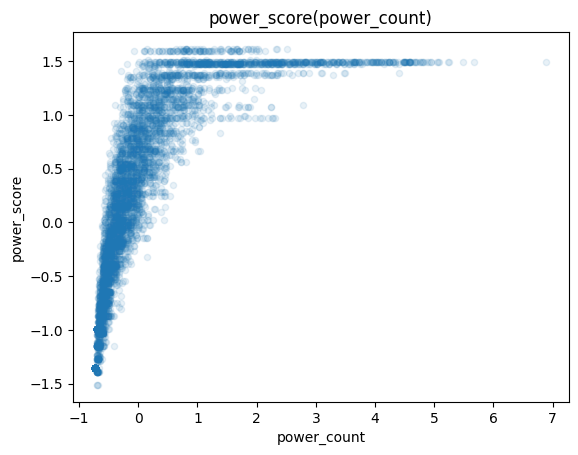

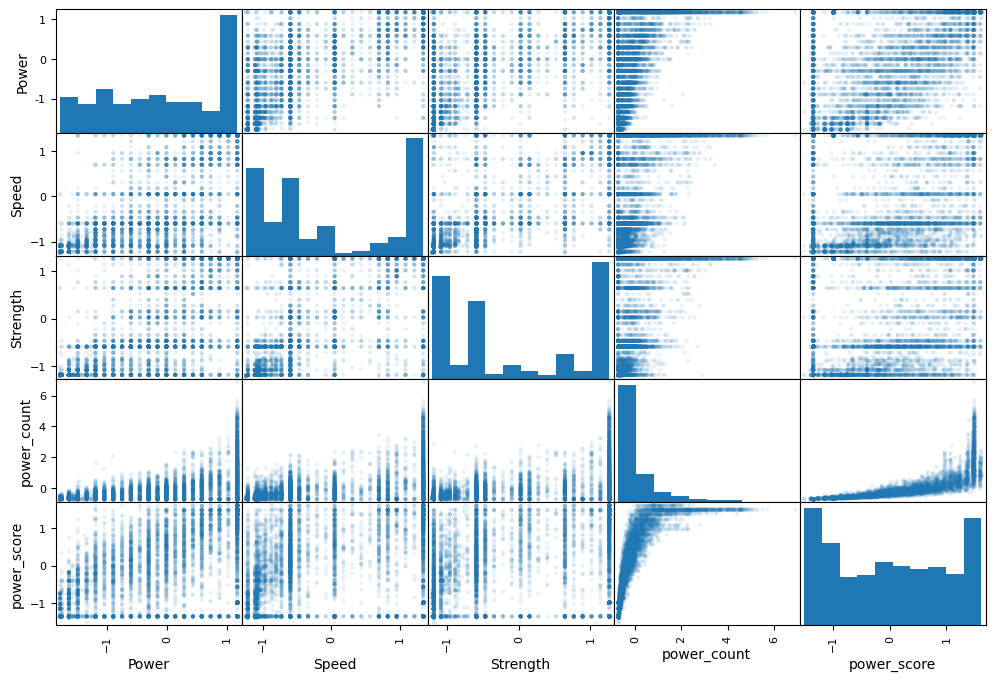

In [14]:
# DATA OBSERVATION
superheroes_copy.plot(kind='scatter', x=13, y=14, alpha=0.1, title='power_score(power_count)')
from pandas.plotting import scatter_matrix
renamer_dict = {
    '9': 'Power', 
    '10': 'Speed', 
    '11': 'Strength', 
    '12': 'power_count', 
    '13': 'power_score'
}
# attributes = ["9", "10", "11", "12", "13"]
attributes = ['Power', 'Speed', 'Strength', 'power_count', 'power_score']
superheroes_copy = superheroes_copy.rename(columns=renamer_dict)
scatter_plt = scatter_matrix(superheroes_copy[attributes], figsize=(12, 8), alpha=0.1)
# save_fig("scatter_matrix_plot")

In [15]:
# SCORES
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg_loaded, train_set, train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.61153965 0.63326047 0.6377864  0.64827308 0.61864524 0.61473995
 0.61365745 0.64805308 0.61038813 0.613059  ]
Mean: 0.6249402451455053
Standard deviation: 0.014547690377156839


<class 'pandas.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Class_value   6708 non-null   float64
 1   Level         6708 non-null   float64
 2   Tier          6708 non-null   float64
 3   Combat        6708 non-null   float64
 4   Durability    6708 non-null   float64
 5   Intelligence  6708 non-null   float64
 6   Omnipotent    6708 non-null   float64
 7   Omnipresent   6708 non-null   float64
 8   Omniscient    6708 non-null   float64
 9   Power         6708 non-null   float64
 10  Speed         6708 non-null   float64
 11  Strength      6708 non-null   float64
 12  power_count   6709 non-null   float64
 13  power_score   6709 non-null   float64
dtypes: float64(14)
memory usage: 733.9 KB
None
        Class_value         Level          Tier        Combat    Durability  \
count  6.708000e+03  6.708000e+03  6.708000e+03  6.708000e+03  6.708000e+03   
mean  -4.7

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


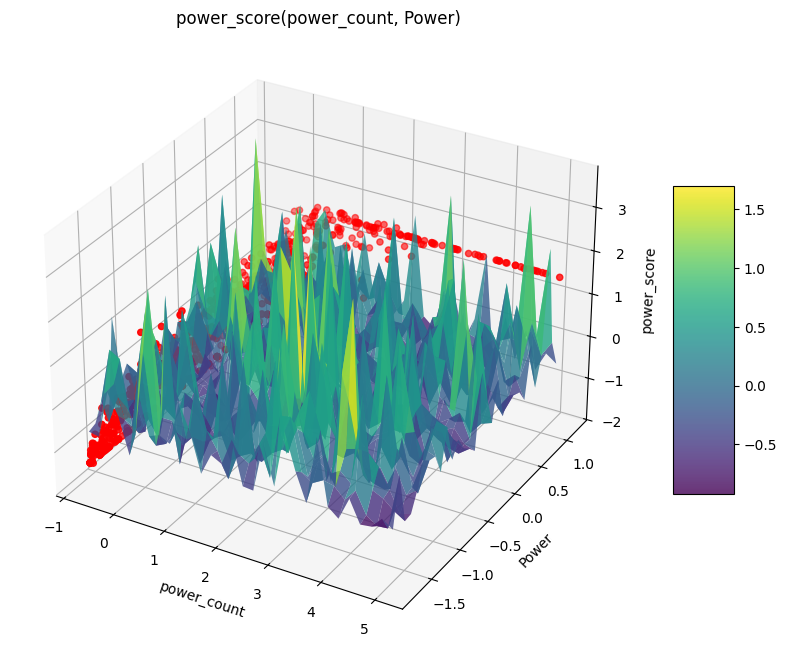

In [18]:
# 3D MESH 
print(superheroes_copy.info())
# superheroes_copy = superheroes_copy.drop(columns='index')
raw_supers = superheroes_copy.copy()
renamer_dict = {
    '0': 'Class_value',
    '1': 'Level',
    '2': 'Tier',
    '3': 'Combat',
    '4': 'Durability',
    '5': 'Intelligence',
    '6': 'Omnipotent',
    '7': 'Omnipresent',
    '8': 'Omniscient',
    '9': 'Power', 
    '10': 'Speed', 
    '11': 'Strength', 
    '12': 'power_count', 
    '13': 'power_score'
}
raw_atribs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
superheroes_copy = superheroes_copy.rename(columns=renamer_dict)
print(superheroes_copy.describe())
feat_x = 'power_count'
feat_y = 'Power'
target = 'power_score'


imputer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median"))
])

raw_supers_no_nan = pd.DataFrame(imputer_pipeline.fit_transform(raw_supers))
raw_supers_no_nan = raw_supers_no_nan.iloc[:900]
x_range = np.linspace(raw_supers_no_nan[12].min(), raw_supers_no_nan[12].max(), 30)
y_range = np.linspace(raw_supers_no_nan[9].min(), raw_supers_no_nan[9].max(), 30)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
Z_mesh = lin_reg_loaded.predict(raw_supers_no_nan[raw_atribs]).reshape(X_mesh.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=0.8)

ax.scatter(raw_supers_no_nan[12].values, raw_supers_no_nan[9].values, raw_supers_no_nan[13].values, color='red', s=20)

ax.set_xlabel(feat_x)
ax.set_ylabel(feat_y)
ax.set_zlabel(target)
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.title('power_score(power_count, Power)')
plt.show()